In [2]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


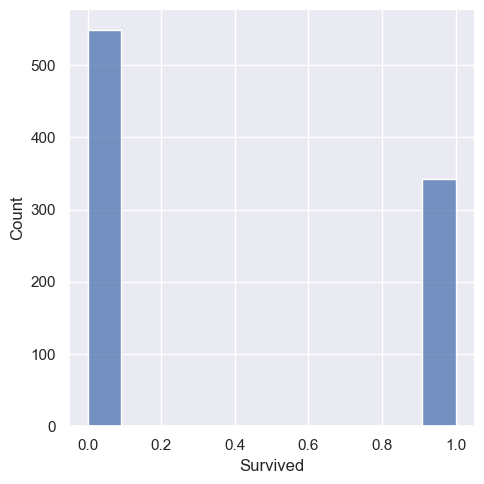

In [4]:
sb.set_theme()
sb.displot(data=df, x='Survived', kind='hist').set_titles('Survival count')

<Axes: xlabel='Age', ylabel='Density'>

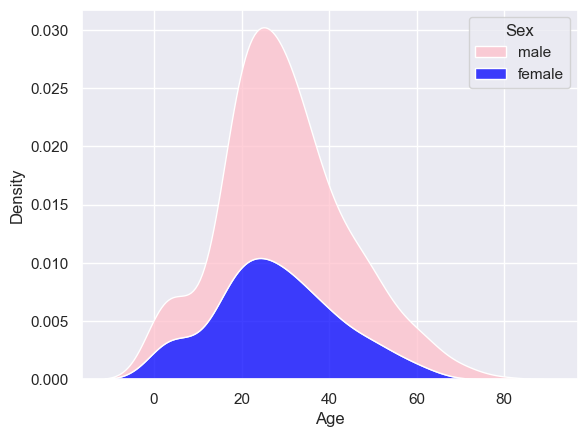

In [5]:
#See if all passengers are either male or female
all(x == 'male' or x == 'female' for x in df['Sex'])

#Show distribution of Survival count by age
sb.kdeplot(data=df, x='Age', hue='Sex', palette=['pink', 'blue'], multiple='stack')

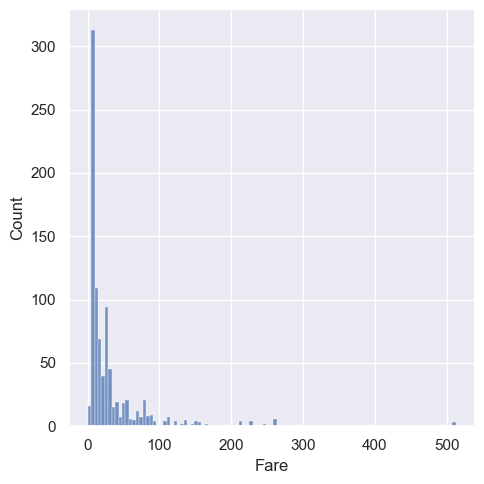

In [6]:
sb.displot(data=df, x='Fare', multiple='stack').set_titles('Survival count by Fare')

Text(0.5, 1.0, 'Third class')

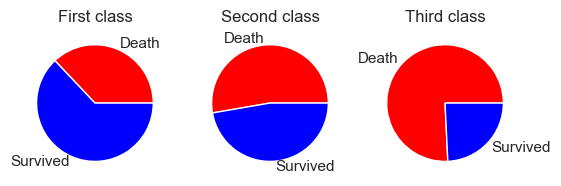

In [7]:
first_class = df.loc[df['Pclass'] == 1]
second_class = df.loc[df['Pclass'] == 2]
third_class = df.loc[df['Pclass'] == 3]

first_class_survival_stats = [first_class.loc[first_class['Survived'] == x].shape[0] for x in range(2)]
second_class_survival_stats = [second_class.loc[second_class['Survived'] == x].shape[0] for x in range(2)]
third_class_survival_stats = [third_class.loc[third_class['Survived'] == x].shape[0] for x in range(2)]
_label = ['Death', 'Survived']

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
_color = ['red', 'blue']
ax1.pie(first_class_survival_stats, colors=_color, labels=_label)
ax1.set_title('First class')
ax2.pie(second_class_survival_stats, colors=_color, labels=_label)
ax2.set_title('Second class')
ax3.pie(third_class_survival_stats, colors=_color, labels=_label)
ax3.set_title('Third class')


Text(0.5, 1.0, 'Southampton')

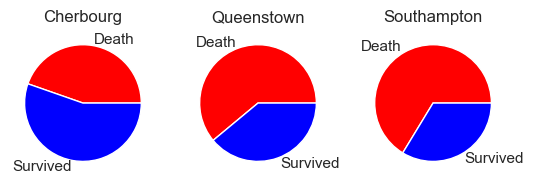

In [8]:
embarked_groups = df.groupby(df.Embarked)
c_group = embarked_groups.get_group('C')
q_group = embarked_groups.get_group('Q')
s_group = embarked_groups.get_group('S')

c_survival_stats = [c_group.loc[c_group['Survived'] == x].shape[0] for x in range(2)]
q_survival_stats = [q_group.loc[q_group['Survived'] == x].shape[0] for x in range(2)]
s_survival_stats = [s_group.loc[s_group['Survived'] == x].shape[0] for x in range(2)]
_label = ['Death', 'Survived']

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
_color = ['red', 'blue']
ax1.pie(c_survival_stats, colors=_color, labels=_label)
ax1.set_title('Cherbourg')
ax2.pie(q_survival_stats, colors=_color, labels=_label)
ax2.set_title('Queenstown')
ax3.pie(s_survival_stats, colors=_color, labels=_label)
ax3.set_title('Southampton')

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']

Text(0.5, 1.0, 'Family Size by survival distribution')

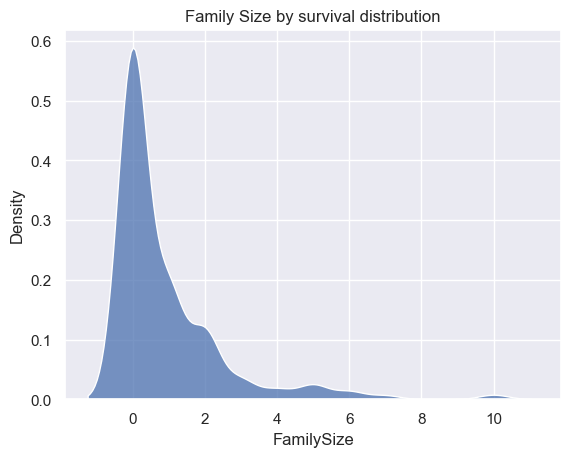

In [10]:
sb.kdeplot(data=df, x='FamilySize', multiple='stack').set_title('Family Size by survival distribution')

<Axes: xlabel='Pclass', ylabel='Count'>

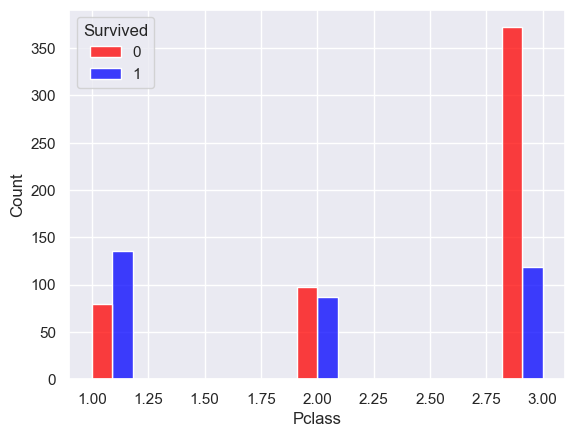

In [11]:
sb.histplot(data=df, x='Pclass', hue='Survived', palette=['red', 'blue'], multiple='dodge')